In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [88]:
churn = pd.read_csv("D:/OWN PROJECT/churn_dataset.csv")

In [89]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [90]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [92]:
churn.drop(labels="customerID",axis=1,inplace=True)

In [93]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
for i in churn.columns:
    print(churn[i].unique())
    print("***********")

['Female' 'Male']
***********
[0 1]
***********
['Yes' 'No']
***********
['No' 'Yes']
***********
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
***********
['No' 'Yes']
***********
['No phone service' 'No' 'Yes']
***********
['DSL' 'Fiber optic' 'No']
***********
['No' 'Yes' 'No internet service']
***********
['Yes' 'No' 'No internet service']
***********
['No' 'Yes' 'No internet service']
***********
['No' 'Yes' 'No internet service']
***********
['No' 'Yes' 'No internet service']
***********
['No' 'Yes' 'No internet service']
***********
['Month-to-month' 'One year' 'Two year']
***********
['Yes' 'No']
***********
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
***********
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
***********
['29.85' '1889.5' '108.15' ... '346.45' '

In [95]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [96]:
churn[churn['TotalCharges'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [97]:
churn['TotalCharges'] = churn['TotalCharges'].apply(lambda x: x.strip()).replace("",np.nan)

In [98]:
churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [99]:
churn.dropna(how = 'any', inplace = True)

In [100]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [101]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [102]:
churn['TotalCharges'] = churn['TotalCharges'].astype(str).astype(float)

In [103]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [104]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### CHURN ANALYSIS ON YES

In [105]:
churn_yes = churn[churn['Churn'] == "Yes"]

In [106]:
churn_yes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


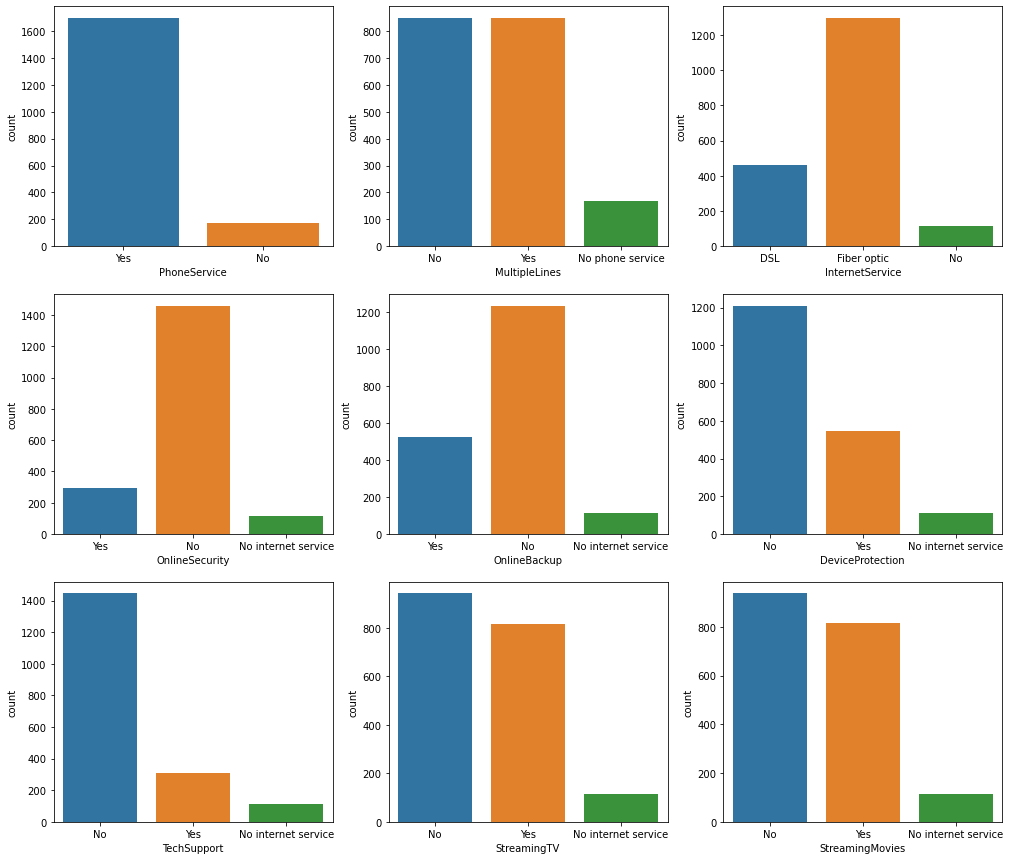

In [107]:
columns=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

plt.figure(figsize=(17,15))

for i,j in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.countplot(x=churn_yes[j])

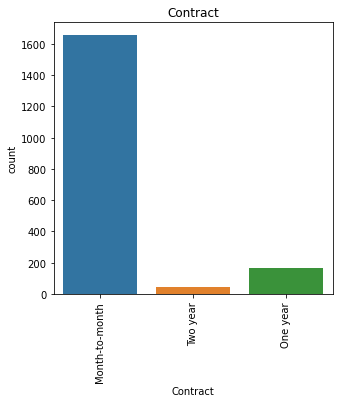

In [108]:
plt.figure(figsize=(5,5))
sns.countplot(x='Contract',data=churn_yes)
plt.xticks(rotation=90,fontsize=10)
plt.title('Contract')
plt.show()

### CHURN ANALYSIS ON NO

In [109]:
churn_no = churn[churn['Churn'] == "No"]

In [110]:
churn_no

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


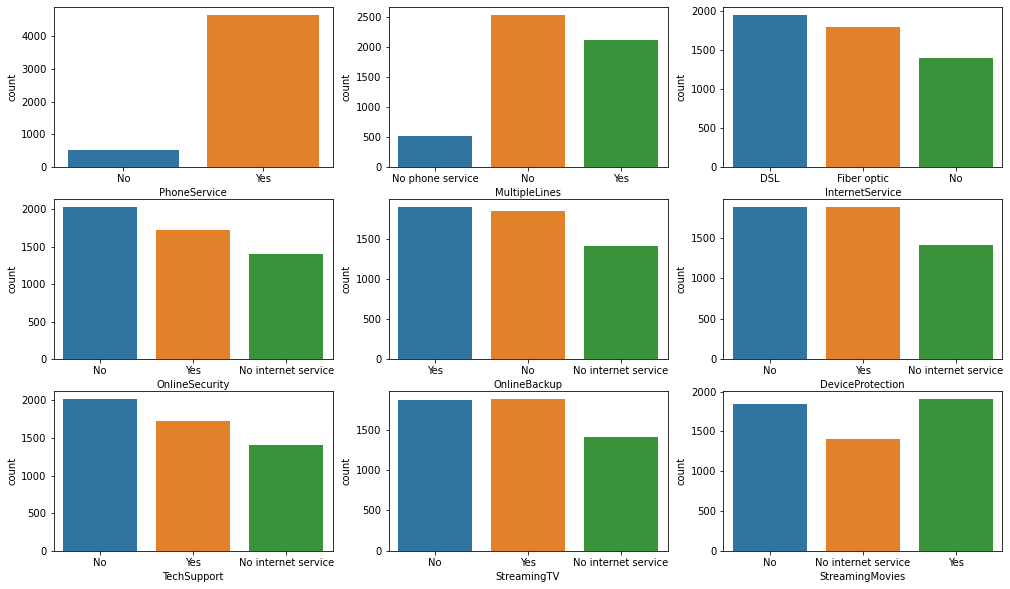

In [111]:
columns=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

plt.figure(figsize=(17,10))

for i,j in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.countplot(x=churn_no[j])

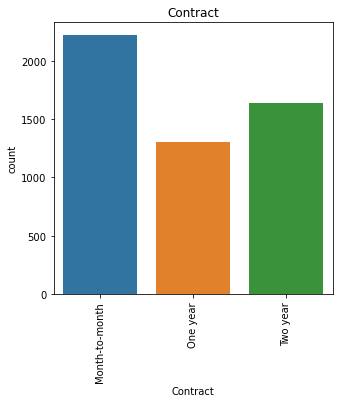

In [112]:
plt.figure(figsize=(5,5))
sns.countplot(x='Contract',data=churn_no)
plt.xticks(rotation=90,fontsize=10)
plt.title('Contract')
plt.show()

### CHURN ANALYSIS ON PaperlessBilling

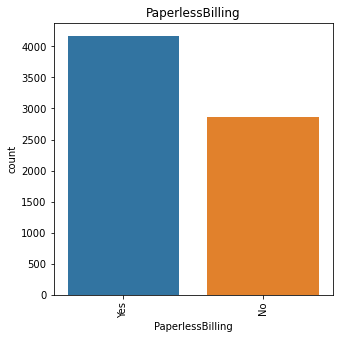

In [113]:
plt.figure(figsize=(5,5))
sns.countplot(x='PaperlessBilling',data=churn)
plt.xticks(rotation=90,fontsize=10)
plt.title('PaperlessBilling')
plt.show()

### CHURN ANALYSIS ON PaymentMethod

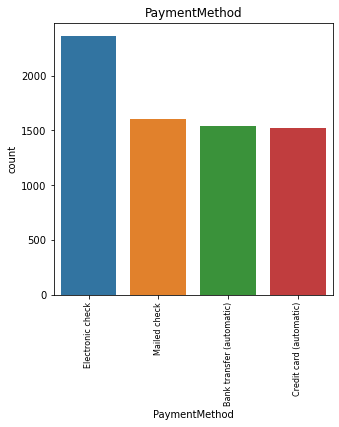

In [114]:
plt.figure(figsize=(5,5))
sns.countplot(x='PaymentMethod',data=churn)
plt.xticks(rotation=90,fontsize=8)
plt.title('PaymentMethod')
plt.show()

### CHURN ANALYSIS ON MonthlyCharges

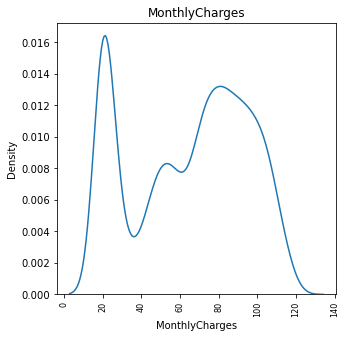

In [115]:
plt.figure(figsize=(5,5))
sns.kdeplot(x='MonthlyCharges',data=churn)
plt.xticks(rotation=90,fontsize=8)
plt.title('MonthlyCharges')
plt.show()

### CHURN ANALYSIS ON TotalCharges

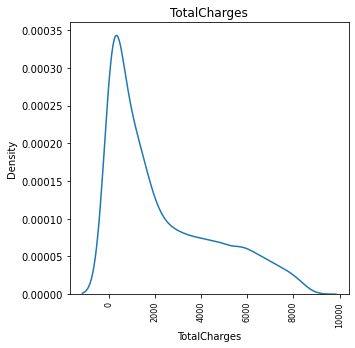

In [116]:
plt.figure(figsize=(5,5))
sns.kdeplot(x='TotalCharges',data=churn)
plt.xticks(rotation=90,fontsize=8)
plt.title('TotalCharges')
plt.show()

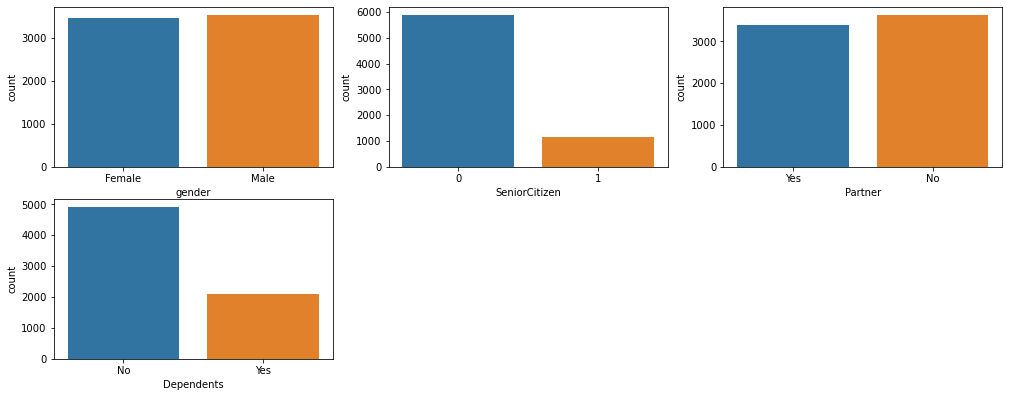

In [117]:
columns=['gender','SeniorCitizen','Partner','Dependents']

plt.figure(figsize=(17,10))

for i,j in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.countplot(x=churn[j])

### feature binning on tenure

In [118]:
tenure_group = []
for i in churn['tenure']:
    if i <= 72 and i>60:
        tenure_group.append("61-72")
    elif i <= 60 and i >48:
        tenure_group.append("49-60")
    elif i <= 48 and i >36:
        tenure_group.append("37-48")
    elif i <= 36 and i > 24:
        tenure_group.append("24-36")
    elif i <=24 and i > 12:
        tenure_group.append("13-24")
    else:
        tenure_group.append("1-12")
        
    

In [119]:
churn['tenure_group'] = tenure_group

In [120]:
churn.drop(labels='tenure',axis=1,inplace=True)

In [121]:
churn['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
24-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

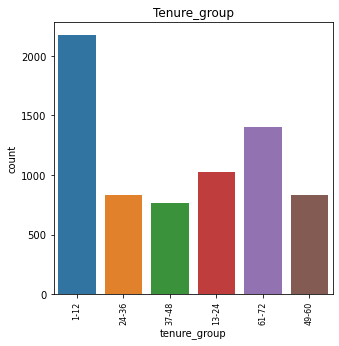

In [122]:
plt.figure(figsize=(5,5))
sns.countplot(x='tenure_group',data=churn)
plt.xticks(rotation=90,fontsize=8)
plt.title('Tenure_group')
plt.show()

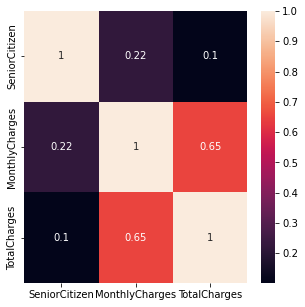

In [123]:
plt.figure(figsize=(5,5))
sns.heatmap(churn.corr(),annot=True)
plt.show()

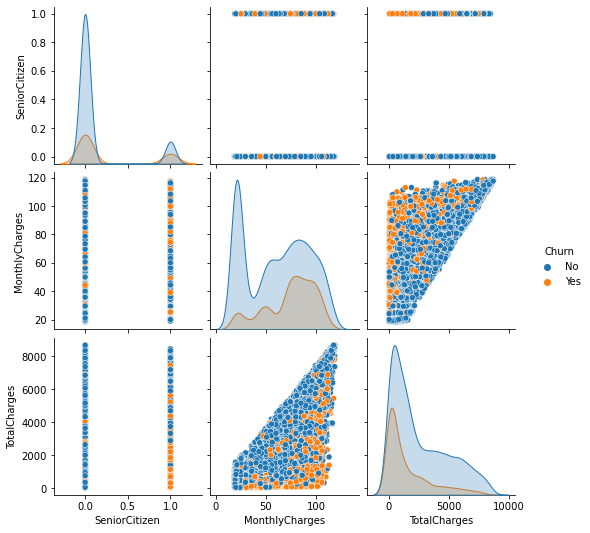

In [124]:
sns.pairplot(data=churn,hue='Churn')
plt.show()

In [125]:
y = churn.pop('Churn')
x = churn


In [126]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [127]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
879,Male,0,No,No,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.65,1665.20,24-36
5790,Female,0,Yes,Yes,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.85,2036.55,37-48
6498,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.30,82.30,1-12
880,Male,0,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,110.10,1043.30,1-12
2784,Female,0,No,Yes,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.10,396.30,1-12


In [128]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(4922, 19) (4922,)
(2110, 19) (2110,)


In [129]:
from sklearn.preprocessing import LabelEncoder
x_label = X_train.apply(LabelEncoder().fit_transform)
x_label

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
879,1,0,0,0,1,2,0,0,2,0,0,0,0,0,1,0,401,2437,2
5790,0,0,1,1,0,1,0,0,2,0,0,2,2,0,1,2,352,2685,3
6498,0,0,0,0,1,0,1,0,2,2,0,0,0,0,1,2,845,309,0
880,1,0,0,0,1,0,1,2,2,2,2,2,2,0,1,2,1335,1839,0
2784,0,0,0,1,1,0,1,0,0,2,2,2,2,0,1,0,1128,1024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,1,1,1,2,2,1,1,1,1,1,1,1,1,1,106,2025,3
3934,0,0,0,1,0,1,0,2,2,0,2,0,0,1,0,3,221,1051,0
5964,0,0,1,1,1,0,0,2,0,2,2,0,0,0,0,0,515,3133,4
6947,1,0,1,1,1,2,1,0,2,0,0,2,2,1,1,1,1183,4379,5


## Feature Selection

### MUTAL INFORMATION GAIN

In [130]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_label,y_train)
mutual_info

array([0.00422485, 0.00912419, 0.01366761, 0.01441471, 0.        ,
       0.00694029, 0.04872668, 0.06694277, 0.05083251, 0.04529705,
       0.06394888, 0.04046693, 0.03334301, 0.1031711 , 0.01622897,
       0.04347275, 0.0494447 , 0.04170395, 0.07616573])

In [131]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Contract            0.103171
tenure_group        0.076166
OnlineSecurity      0.066943
TechSupport         0.063949
OnlineBackup        0.050833
MonthlyCharges      0.049445
InternetService     0.048727
DeviceProtection    0.045297
PaymentMethod       0.043473
TotalCharges        0.041704
StreamingTV         0.040467
StreamingMovies     0.033343
PaperlessBilling    0.016229
Dependents          0.014415
Partner             0.013668
SeniorCitizen       0.009124
MultipleLines       0.006940
gender              0.004225
PhoneService        0.000000
dtype: float64

<AxesSubplot:>

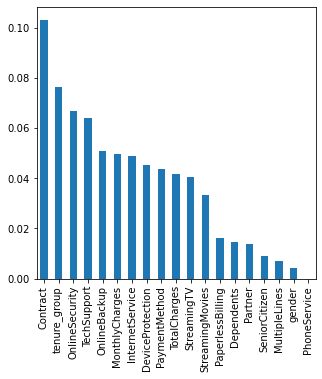

In [132]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(5,5))

In [133]:
X_train= X_train[['Contract','TechSupport','tenure_group','OnlineSecurity','InternetService','MonthlyCharges','OnlineBackup','TotalCharges','DeviceProtection','StreamingTV','PaymentMethod','StreamingMovies']]
X_train.head()

,Contract,TechSupport,tenure_group,OnlineSecurity,InternetService,MonthlyCharges,OnlineBackup,TotalCharges,DeviceProtection,StreamingTV,PaymentMethod,StreamingMovies
879,Month-to-month,No,24-36,No,DSL,54.65,Yes,1665.20,No,No,Bank transfer (automatic),No
5790,Month-to-month,No,37-48,No,DSL,50.85,Yes,2036.55,No,Yes,Electronic check,Yes
6498,Month-to-month,No,1-12,No,Fiber optic,82.30,Yes,82.30,Yes,No,Electronic check,No
880,Month-to-month,Yes,1-12,Yes,Fiber optic,110.10,Yes,1043.30,Yes,Yes,Electronic check,Yes
2784,Month-to-month,Yes,1-12,No,Fiber optic,98.10,No,396.30,Yes,Yes,Bank transfer (automatic),Yes


In [134]:
X_test= X_test[['Contract','TechSupport','tenure_group','OnlineSecurity','InternetService','MonthlyCharges','OnlineBackup','TotalCharges','DeviceProtection','StreamingTV','PaymentMethod','StreamingMovies']]
X_test.head()

,Contract,TechSupport,tenure_group,OnlineSecurity,InternetService,MonthlyCharges,OnlineBackup,TotalCharges,DeviceProtection,StreamingTV,PaymentMethod,StreamingMovies
942,Month-to-month,No,13-24,No,Fiber optic,79.85,No,2001.00,No,No,Credit card (automatic),Yes
3730,Month-to-month,No,49-60,No,Fiber optic,104.50,Yes,5921.35,Yes,Yes,Credit card (automatic),Yes
1761,Two year,No internet service,49-60,No internet service,No,24.45,No internet service,1513.60,No internet service,No internet service,Credit card (automatic),No internet service
2283,Month-to-month,No,1-12,No,Fiber optic,71.55,No,71.55,No,No,Mailed check,No
1872,Two year,No internet service,37-48,No internet service,No,19.70,No internet service,804.25,No internet service,No internet service,Bank transfer (automatic),No internet service


### APPLYING SCALING AND ONE-HOT ENCODING ON TRAIN DATA

In [135]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,Contract,TechSupport,tenure_group,OnlineSecurity,InternetService,OnlineBackup,DeviceProtection,StreamingTV,PaymentMethod,StreamingMovies
879,Month-to-month,No,24-36,No,DSL,Yes,No,No,Bank transfer (automatic),No
5790,Month-to-month,No,37-48,No,DSL,Yes,No,Yes,Electronic check,Yes
6498,Month-to-month,No,1-12,No,Fiber optic,Yes,Yes,No,Electronic check,No
880,Month-to-month,Yes,1-12,Yes,Fiber optic,Yes,Yes,Yes,Electronic check,Yes
2784,Month-to-month,Yes,1-12,No,Fiber optic,No,Yes,Yes,Bank transfer (automatic),Yes


In [136]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,MonthlyCharges,TotalCharges
879,54.65,1665.20
5790,50.85,2036.55
6498,82.30,82.30
880,110.10,1043.30
2784,98.10,396.30


In [137]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,MonthlyCharges,TotalCharges
879,-0.338074,-0.276449
5790,-0.464443,-0.112702
6498,0.581425,-0.974430
880,1.505913,-0.550676
2784,1.106854,-0.835971


In [138]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,Contract_One year,Contract_Two year,TechSupport_No internet service,TechSupport_Yes,tenure_group_13-24,tenure_group_24-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72,OnlineSecurity_No internet service,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes
879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5790,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
880,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [139]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,TechSupport_No internet service,TechSupport_Yes,tenure_group_13-24,tenure_group_24-36,tenure_group_37-48,tenure_group_49-60,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes
879,-0.338074,-0.276449,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5790,-0.464443,-0.112702,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6498,0.581425,-0.974430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
880,1.505913,-0.550676,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2784,1.106854,-0.835971,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### APPLYING SCALING AND ONE HOT ENCODING ON TEST DATA

In [140]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,Contract,TechSupport,tenure_group,OnlineSecurity,InternetService,OnlineBackup,DeviceProtection,StreamingTV,PaymentMethod,StreamingMovies
942,Month-to-month,No,13-24,No,Fiber optic,No,No,No,Credit card (automatic),Yes
3730,Month-to-month,No,49-60,No,Fiber optic,Yes,Yes,Yes,Credit card (automatic),Yes
1761,Two year,No internet service,49-60,No internet service,No,No internet service,No internet service,No internet service,Credit card (automatic),No internet service
2283,Month-to-month,No,1-12,No,Fiber optic,No,No,No,Mailed check,No
1872,Two year,No internet service,37-48,No internet service,No,No internet service,No internet service,No internet service,Bank transfer (automatic),No internet service


In [141]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,MonthlyCharges,TotalCharges
942,79.85,2001.00
3730,104.50,5921.35
1761,24.45,1513.60
2283,71.55,71.55
1872,19.70,804.25


In [142]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,MonthlyCharges,TotalCharges
942,0.499951,-0.128378
3730,1.319685,1.600302
1761,-1.342374,-0.343297
2283,0.223935,-0.979170
1872,-1.500335,-0.656086


In [143]:
encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,Contract_One year,Contract_Two year,TechSupport_No internet service,TechSupport_Yes,tenure_group_13-24,tenure_group_24-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72,OnlineSecurity_No internet service,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes
942,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1761,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1872,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [144]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,TechSupport_No internet service,TechSupport_Yes,tenure_group_13-24,tenure_group_24-36,tenure_group_37-48,tenure_group_49-60,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes
942,0.499951,-0.128378,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3730,1.319685,1.600302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1761,-1.342374,-0.343297,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2283,0.223935,-0.979170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1872,-1.500335,-0.656086,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### LogisticRegression

In [145]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)

LogisticRegression()

In [146]:
y_train_pred = regressor.predict(X_train_transformed)

In [147]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,No
5790,No,No
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [148]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.7960178789110118
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      3635
         Yes       0.65      0.47      0.54      1287

    accuracy                           0.80      4922
   macro avg       0.74      0.69      0.71      4922
weighted avg       0.78      0.80      0.78      4922



In [149]:
y_test_pred = regressor.predict(X_test_transformed)

In [150]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [151]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.7881516587677725
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1528
         Yes       0.66      0.49      0.56       582

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train_transformed,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.7978457348025257


In [153]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_train_transformed,y_train)


LogisticRegression(C=0.1)

In [154]:
y_train_pred = logreg2.predict(X_train_transformed)

In [155]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,No
5790,No,No
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [156]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.800284437220642
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      3635
         Yes       0.67      0.47      0.55      1287

    accuracy                           0.80      4922
   macro avg       0.75      0.70      0.71      4922
weighted avg       0.79      0.80      0.79      4922



In [157]:
y_test_pred = logreg2.predict(X_test_transformed)

In [158]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [159]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.7909952606635071
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1528
         Yes       0.66      0.49      0.56       582

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



### KNN classifier

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [161]:
y_train_pred = knn.predict(X_train_transformed)

In [162]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,No
5790,No,No
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [163]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8425436814303129
              precision    recall  f1-score   support

          No       0.88      0.91      0.89      3635
         Yes       0.72      0.66      0.69      1287

    accuracy                           0.84      4922
   macro avg       0.80      0.78      0.79      4922
weighted avg       0.84      0.84      0.84      4922



In [164]:
y_test_pred = knn.predict(X_test_transformed)

In [165]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,Yes
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [166]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.7511848341232228
              precision    recall  f1-score   support

          No       0.82      0.84      0.83      1528
         Yes       0.55      0.51      0.53       582

    accuracy                           0.75      2110
   macro avg       0.69      0.68      0.68      2110
weighted avg       0.75      0.75      0.75      2110



In [167]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(
    estimator=KNeighborsClassifier(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [168]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)


Best parameters set found on train set
{'p': 1, 'n_neighbors': 33}
KNeighborsClassifier(n_neighbors=33, p=1)


In [169]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=33, p=1)
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=33, p=1)

In [170]:
y_train_pred = knn.predict(X_train_transformed)

In [171]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,No
5790,No,No
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [172]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8075985371800082
              precision    recall  f1-score   support

          No       0.86      0.89      0.87      3635
         Yes       0.65      0.59      0.61      1287

    accuracy                           0.81      4922
   macro avg       0.75      0.74      0.74      4922
weighted avg       0.80      0.81      0.80      4922



In [173]:
y_test_pred = knn.predict(X_test_transformed)

In [174]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [175]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.7777251184834123
              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1528
         Yes       0.61      0.53      0.57       582

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.77      2110



### Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [177]:
y_train_pred = decisiontree.predict(X_train_transformed)

In [178]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,No
5790,No,No
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [179]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9951239333604226
              precision    recall  f1-score   support

          No       0.99      1.00      1.00      3635
         Yes       1.00      0.98      0.99      1287

    accuracy                           1.00      4922
   macro avg       1.00      0.99      0.99      4922
weighted avg       1.00      1.00      1.00      4922



In [180]:
y_test_pred = decisiontree.predict(X_test_transformed)

In [181]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,Yes
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [182]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.7355450236966825
              precision    recall  f1-score   support

          No       0.81      0.82      0.82      1528
         Yes       0.52      0.51      0.52       582

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.73      0.74      0.73      2110



### Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [184]:
y_train_pred = random_forest.predict(X_train_transformed)

In [185]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,No
5790,No,No
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [186]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9951239333604226
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      3635
         Yes       0.99      0.99      0.99      1287

    accuracy                           1.00      4922
   macro avg       0.99      0.99      0.99      4922
weighted avg       1.00      1.00      1.00      4922



In [187]:
y_test_pred = random_forest.predict(X_test_transformed)

In [188]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [189]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.7706161137440758
              precision    recall  f1-score   support

          No       0.82      0.88      0.85      1528
         Yes       0.61      0.48      0.54       582

    accuracy                           0.77      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.77      0.76      2110



### SUPPORT VECTOR MACHINE

In [190]:
from sklearn.svm import SVC
support_vector = SVC()
support_vector.fit(X_train_transformed, y_train)

SVC()

In [191]:
y_train_pred = support_vector.predict(X_train_transformed)

In [192]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,No
5790,No,No
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [99]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.806989028850061
              precision    recall  f1-score   support

          No       0.83      0.92      0.88      3635
         Yes       0.69      0.48      0.57      1287

    accuracy                           0.81      4922
   macro avg       0.76      0.70      0.72      4922
weighted avg       0.80      0.81      0.79      4922



In [193]:
y_test_pred = support_vector.predict(X_test_transformed)

In [194]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [195]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.7938388625592417
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1528
         Yes       0.68      0.49      0.57       582

    accuracy                           0.79      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [196]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(
    estimator=SVC(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'gamma': array([0.58192352, 0.06053436, 0.88657499]),
                                         'kernel': ['rbf']},
                                        {'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [197]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.060534362371988615, 'C': 10}
SVC(C=10, gamma=0.060534362371988615)

Score on Test Data:  0.7938388625592417


In [199]:
from sklearn.svm import SVC
support_vector = SVC(C=10, gamma=0.06)
support_vector.fit(X_train_transformed, y_train)

SVC(C=10, gamma=0.06)

In [200]:
y_train_pred = support_vector.predict(X_train_transformed)

In [201]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,No
5790,No,No
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [202]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.810646078829744
              precision    recall  f1-score   support

          No       0.84      0.92      0.88      3635
         Yes       0.69      0.51      0.58      1287

    accuracy                           0.81      4922
   macro avg       0.76      0.71      0.73      4922
weighted avg       0.80      0.81      0.80      4922



In [203]:
y_test_pred = support_vector.predict(X_test_transformed)

In [204]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [205]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.7933649289099526
              precision    recall  f1-score   support

          No       0.83      0.91      0.86      1528
         Yes       0.67      0.50      0.57       582

    accuracy                           0.79      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



### Navie Byes

In [103]:
from sklearn.naive_bayes import GaussianNB
navie_byes = GaussianNB()
navie_byes.fit(X_train_transformed, y_train)

GaussianNB()

In [104]:
y_train_pred = navie_byes.predict(X_train_transformed)

In [105]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,Yes
5790,No,Yes
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [106]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.6720845184884193
              precision    recall  f1-score   support

          No       0.93      0.60      0.73      3635
         Yes       0.44      0.88      0.58      1287

    accuracy                           0.67      4922
   macro avg       0.68      0.74      0.66      4922
weighted avg       0.80      0.67      0.69      4922



In [107]:
y_test_pred = navie_byes.predict(X_test_transformed)

In [108]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,Yes
3730,Yes,Yes
1761,No,No
2283,Yes,Yes
1872,No,No


In [109]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.6582938388625592
              precision    recall  f1-score   support

          No       0.91      0.59      0.71      1528
         Yes       0.44      0.85      0.58       582

    accuracy                           0.66      2110
   macro avg       0.67      0.72      0.65      2110
weighted avg       0.78      0.66      0.68      2110



### Stacking Classifier

In [110]:
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

estimators = [
    ('lr', LogisticRegression()),
    ("knn",KNeighborsClassifier(n_neighbors=45, p=1)),
    ('svc',SVC())
]

stack_classifier = StackingClassifier(estimators=estimators,
                                      final_estimator=LogisticRegression())

stack_classifier.fit(X_train_transformed, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=45, p=1)),
                               ('svc', SVC())],
                   final_estimator=LogisticRegression())

In [111]:
y_train_pred = stack_classifier.predict(X_train_transformed)

In [112]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
879,No,No
5790,No,No
6498,Yes,Yes
880,Yes,Yes
2784,Yes,Yes


In [113]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.7962210483543275
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      3635
         Yes       0.65      0.47      0.55      1287

    accuracy                           0.80      4922
   macro avg       0.74      0.69      0.71      4922
weighted avg       0.78      0.80      0.78      4922



In [114]:
y_test_pred = stack_classifier.predict(X_test_transformed)

In [115]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [116]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.785781990521327
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1528
         Yes       0.66      0.47      0.55       582

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.70      2110
weighted avg       0.77      0.79      0.77      2110



- Contract,TechSupport,tenure_group,OnlineSecurity,InternetService,MonthlyCharges,OnlineBackup,TotalCharges,DeviceProtection,StreamingTV,PaymentMethod,StreamingMovies are the important feature  for churn anlaysis.

- Linear Regression and Support Vector Classifier working good for churn analysis.

